In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv(r"C:\Users\HP\Maths and statistics course codebasics\files\chapter4_assets\7_outlier_detection_using_iqr_boxplot\heights.csv")
df.head()

,name,height
0,mohan,1.2
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [32]:
Q1 , Q3 = df.height.quantile([0.25,0.75])       # *****************************************************************************
Q1 , Q3

(5.3500000000000005, 6.275)

In [33]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [34]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower , upper

(3.962500000000001, 7.6625)

(lower , upper )  --------> (3.9625 , 7.6625)      if a value is not in this range , it is an outlier

In [35]:
df[df.height < lower]          # identify lower outliers

,name,height
0,mohan,1.2


In [36]:
df[df.height > upper]              # identify upper outliers

,name,height
19,Liu,40.2


In [37]:
df[(df.height < lower) | (df.height > upper)]     # all in one code !!!!!!!!!!

,name,height
0,mohan,1.2
19,Liu,40.2


In [38]:
df_new = df[(df.height > lower) & (df.height < upper)] 
                                     # remove outliers and get withing boundary data into another new data frame
df_new

,name,height
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8


In [39]:
dff= pd.read_excel(r"C:\Users\HP\Maths and statistics course codebasics\files\chapter4_assets\7_outlier_detection_using_iqr_boxplot\region_wise_sales.xlsx")
dff.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [40]:
labels = dff.Region.unique()

In [41]:
df_apac = dff[dff.Region == "APAC"]
df_europe = dff[dff.Region == "Europe"]
df_americas = dff[dff.Region == "Americas"]

In [42]:
def get_lower_upper(data):
    Q1 , Q3 = data.Sales.quantile([0.25,0.75])
    IQR = Q3 - Q1                                  #create a function for get upper and lower values
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower , upper


In [43]:
lower , upper = get_lower_upper(df_apac)
lower , upper

(-737.125, 59747.875)

In [44]:
df_apac.describe()

,Year,Sales
count,12.0,12.000000
mean,2022.0,29762.166667
std,0.0,7725.522905
min,2022.0,18579.000000
25%,2022.0,21944.750000
50%,2022.0,31215.500000
75%,2022.0,37066.000000
max,2022.0,38143.000000


min and max withing the range there not outliers

-----------------------------------------------------------------------------------------

In [45]:
lower , upper = get_lower_upper(df_europe)
lower , upper

(7306.875, 17665.875)

In [46]:
df_europe.describe()

,Year,Sales
count,12.0,12.000000
mean,2022.0,13147.583333
std,0.0,3549.568795
min,2022.0,9665.000000
25%,2022.0,11191.500000
50%,2022.0,12044.000000
75%,2022.0,13781.250000
max,2022.0,23000.000000


In [47]:
df_europe[(df_europe.Sales < lower)| (df_europe.Sales > upper)]

,Month,Year,Region,Sales
21,October,2022,Europe,23000


Have an outlier

------------------------------------------------------------------------------------------------------------------------

In [48]:
lower , upper = get_lower_upper(df_americas)
lower , upper

(16832.375, 38473.375)

In [49]:
df_americas.describe()

,Year,Sales
count,12.0,12.000000
mean,2022.0,28356.750000
std,0.0,3610.368556
min,2022.0,23407.000000
25%,2022.0,24947.750000
50%,2022.0,28770.500000
75%,2022.0,30358.000000
max,2022.0,34102.000000


# -------------------------------------------------------------------------------------------------------------

In [50]:
labels = dff["Region"].unique()
labels

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [51]:
plot_data = [ dff["Sales"][dff['Region']== label].values  for label in labels]
plot_data

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896], dtype=int64),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895], dtype=int64),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387], dtype=int64)]

In [52]:
plot_dataaa = []

for label in labels:
    sales_in_region = dff[dff['Region'] == label]['Sales'].values
    plot_dataaa.append(sales_in_region)
plot_dataaa



[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896], dtype=int64),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895], dtype=int64),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387], dtype=int64)]

In [53]:
dff[dff.Region == "Europe"]["Year"].values

array([2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
       2022], dtype=int64)

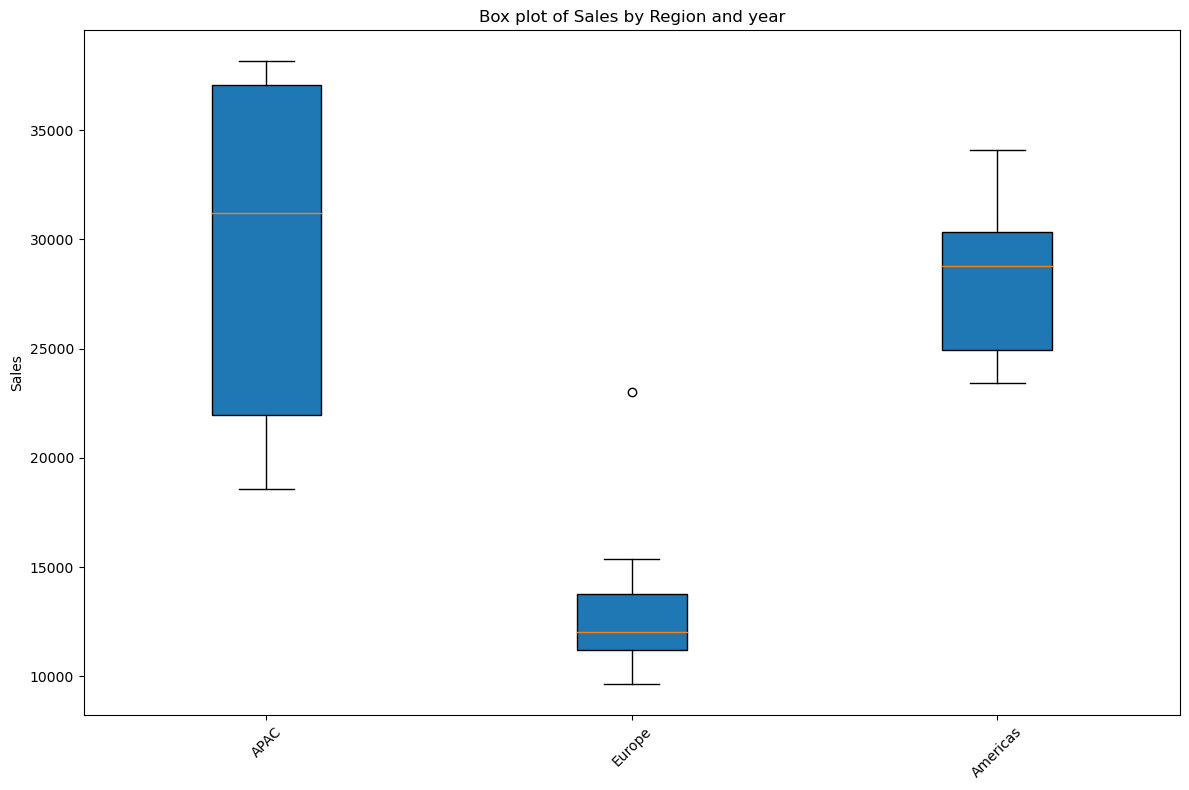

In [55]:
plt.figure(figsize = (12,8))
plt.boxplot(plot_data, labels = labels , vert = True , patch_artist = True)
plt.title('Box plot of Sales by Region and year')
plt.ylabel('Sales')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

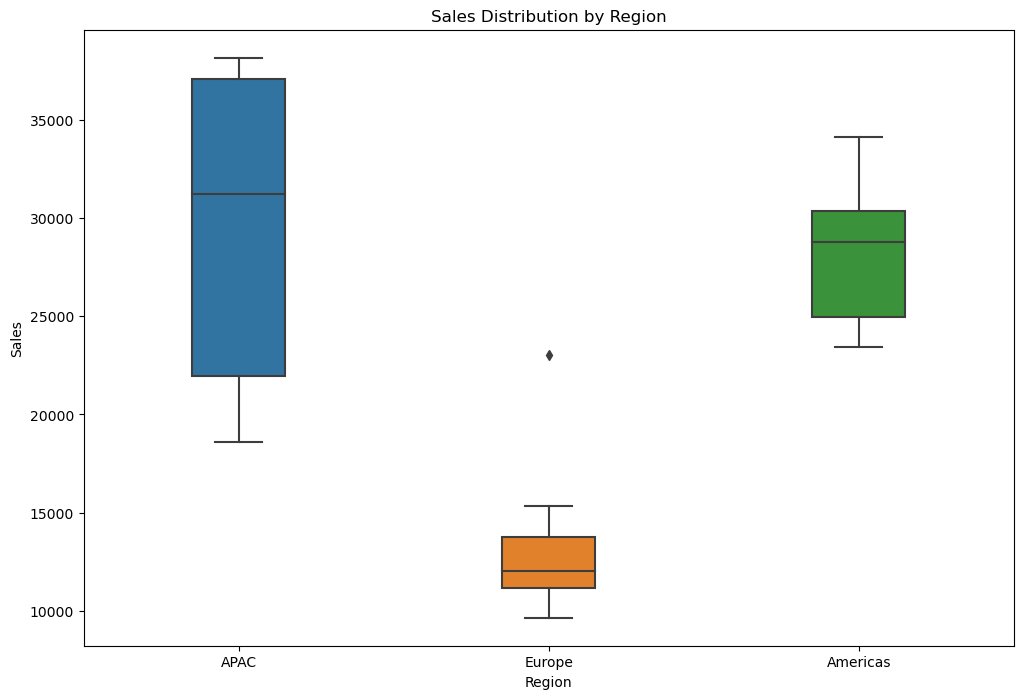

In [56]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Sales', data=dff , width = 0.3)
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

there have a data in center it is an outlier